created on: Thu Jan 16 13:35:03 2020
<br>
Group 7
<br>
@authors: V.B., C.L.

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

In [55]:
path_project = '/Users/vincent/Documents/projet/'
path_pred = path_project + 'Pred/'
path_real = path_project + 'df_csv/'

In [56]:
df_pred = pd.read_csv(path_pred + 'pred_SEATGURU.csv', sep=';')
df_real = pd.read_csv(path_real + 'g7_SEATGURU_annotate.csv', sep=';')


In [57]:
df_pred.rename(columns={"img": "name"}, inplace = True)

In [58]:
df = pd.merge(df_real, df_pred, on = "name")

In [59]:
ls_model = ['A320','A321','A330','A350','A380','737','747','757','777']
ls_man = ['Airbus', 'Boeing']

In [60]:
model_view = df[df.loc[:, 'view_x'] != df.loc[:, 'view_y']][['name', 'view_x', 'view_y']]


In [61]:
model_ext = df[(df['view_y'] == 'Ext') & (df['view_x'] == 'Ext') & (df['aircraft_type'].isin(ls_model)) & (df['aircraft_type'] != df['type'])][['name','aircraft_type', 'type']]


In [62]:
model_int_man = df[(df['view_y'] == 'Int') & (df['view_x'] == 'Int') & (df['aircraft_manufacturer'].isin(ls_man)) & (df['manufacturer'].isin(ls_man)) & (df['aircraft_manufacturer'] != df['manufacturer'])][['name', 'aircraft_manufacturer', 'manufacturer']]


In [63]:
model_int_type = df[(df['view_y'] == 'Int') & (df['view_x'] == 'Int') & (df['aircraft_type'].isin(ls_model)) & (df['type'].isin(ls_model)) & (df['aircraft_type'] != df['type'])][['name', 'aircraft_type', 'type']]


In [64]:
model_view_all = df[['name', 'view_x', 'view_y']]
model_ext_all = df[(df['view_y'] == 'Ext') & (df['view_x'] == 'Ext') & (df['aircraft_type'].isin(ls_model))][['name','aircraft_type', 'type']]
model_int_man_all = df[(df['view_y'] == 'Int') & (df['view_x'] == 'Int') & (df['aircraft_manufacturer'].isin(ls_man)) & (df['manufacturer'].isin(ls_man))][['name', 'aircraft_manufacturer', 'manufacturer']]
model_int_type_all = df[(df['view_y'] == 'Int') & (df['view_x'] == 'Int') & (df['aircraft_type'].isin(ls_model)) & (df['type'].isin(ls_model))][['name', 'aircraft_type', 'type']]


In [65]:
metric_view = model_view.shape[0]/model_view_all.shape[0]
metric_view

0.03834115805946792

In [66]:
metric_ext = model_ext.shape[0]/model_ext_all.shape[0]
metric_ext

0.8639455782312925

In [67]:
metric_int_man = model_int_man.shape[0]/model_int_man_all.shape[0]
metric_int_man

0.1875784190715182

In [68]:
metric_int_type = model_int_type.shape[0]/model_int_type_all.shape[0]
metric_int_type

0.409435551811289

In [101]:
# Dataframes with predictions errors

df['pred_OK'] = df.apply(lambda x :  x['view_x'] == x['view_y'], axis = 1)
df_view = df[['name', 'view_x', 'view_y', 'view_proba', 'pred_OK']]

df_view_OK = df_view[df_view['pred_OK']== True]
df_view_OK

,name,view_x,view_y,view_proba,pred_OK
0,Cathay_Pacific_Airways_Boeing_777-300ER_C_0.jpg,Meal,Meal,0.999923,True
1,KLM_Airbus_A330-300_1.jpg,Int,Int,0.999998,True
2,American_Airlines_Boeing_767-300_3.jpg,Int,Int,1.000000,True
3,Air_Canada_Boeing_767-300ER_v2_3.jpg,Meal,Meal,0.998920,True
4,United_Airlines_Q400_A_2.jpg,Ext,Ext,0.999992,True
5,American_Airlines_Boeing_787-8_1.jpg,Int,Int,0.999998,True
6,Edelweiss_Air_A340-300_0.jpg,Int,Int,1.000000,True
7,Etihad_Airways_Airbus_A380_0.jpg,Int,Int,0.999999,True
8,United_Airlines_Boeing_767_300_ER_1.jpg,Int,Int,0.999027,True
10,China_Eastern_Boeing_777_300ER_0.jpg,Int,Int,0.999645,True


In [102]:
df_view_err_no_others = df_view[(df_view['pred_OK']==False) &(df_view['view_x']!='Others')]
df_view_err_no_others

,name,view_x,view_y,view_proba,pred_OK
87,Qantas_Airways_Boeing_789_1.jpg,Meal,Int,0.993496,False
250,United_Airlines_Boeing_777-200_3_New_4.jpg,Int,Meal,0.547172,False
340,AirAsia_X_Airbus_A330-300_0.jpg,Meal,Int,0.956427,False
354,Saudia_Embraer_170_2.jpg,Ext,Int,0.692464,False
356,United_Airlines_Boeing_737-900_E_4.jpg,Ext,Ext_Int,0.962702,False
412,Norwegian_Air_Shuttle_Boeing_787-8_4.jpg,Ext_Int,Int,0.587574,False
494,Turkish_Airlines_Airbus_A330-300_2.jpg,Int,Meal,0.698858,False
552,Air_New_Zealand_Q300_3.jpg,Ext_Int,Int,0.771089,False
591,Air_New_Zealand_Q300_4.jpg,Ext,Int,0.626707,False
617,Delta_Airlines_Boeing_767-300ER_C_0.jpg,Int,Meal,0.937975,False


In [103]:
df_view_err_others = df_view[(df_view['pred_OK']==False) &(df_view['view_x']=='Others')]
df_view_err_others

,name,view_x,view_y,view_proba,pred_OK
9,Iberia_Airbus_A330-200_0.jpg,Others,Int,0.997912,False
11,Oman_Air_Boeing_737-900_3.jpg,Others,Int,0.675050,False
64,United_Airlines_Bombardier_Q300_2.jpg,Others,Meal,0.628836,False
90,Lufthansa_Boeing_747_8_V3_0.jpg,Others,Int,0.990867,False
96,Malaysia_Airlines_Airbus_A380_new_4.jpg,Others,Ext,0.724728,False
123,Avianca_Airbus_A320-200_1.jpg,Others,Meal,0.392876,False
155,Copa_Airlines_Boeing_737-700_4.jpg,Others,Int,0.997821,False
171,Qantas_Airways_Airbus_A330-300_2.jpg,Others,Int,0.350419,False
203,Nok_Air_Boeing_737-800_3.jpg,Others,Int,1.000000,False
243,Royal_Jordanian_Boeing_787-8_4.jpg,Others,Meal,0.644536,False


In [104]:
def plot_hist(df, col):
    data = [go.Histogram(x = df[col], 
                         histnorm='percent',
                        xbins=dict(
                            start=0,
                            end=1,
                            size=.01
                        ))]
    
    layout = dict(
        title = 'Histogram of the ' + col + ' column on ' + str(df.shape[0]) + ' values'
    )
    
    fig = dict(data = data, layout = layout)
    
    iplot(fig)

In [105]:
plot_hist(df_view_OK, 'view_proba')

In [106]:
plot_hist(df_view_err_others, 'view_proba')

In [107]:
plot_hist(df_view_err_no_others, 'view_proba')

In [111]:
df_view_OK[df_view_OK['view_proba'] < .6].shape[0]

7

In [112]:
df_view_err_no_others[df_view_err_no_others['view_proba'] < .6].shape[0]

7

In [113]:
df_view_err_others[df_view_err_others['view_proba'] < .6].shape[0]

7

# décomposition

In [36]:
int_man = df[(df['view_y'] == 'Int') & (df['view_x'] == 'Int') ][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_man

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
1,KLM_Airbus_A330-300_1.jpg,Airbus,Airbus,0.994603
2,American_Airlines_Boeing_767-300_3.jpg,Boeing,Boeing,0.998506
5,American_Airlines_Boeing_787-8_1.jpg,Boeing,Boeing,0.737958
6,Edelweiss_Air_A340-300_0.jpg,Other,Airbus,0.922528
7,Etihad_Airways_Airbus_A380_0.jpg,Airbus,Airbus,0.999975
8,United_Airlines_Boeing_767_300_ER_1.jpg,Boeing,Boeing,0.999589
10,China_Eastern_Boeing_777_300ER_0.jpg,Boeing,Airbus,0.973872
14,Delta_Airlines_Boeing_767-300_D_New_0.jpg,Boeing,Boeing,0.998705
15,Lufthansa_Embraer_190_0.jpg,Other,Boeing,0.827964
17,Hawaiian_Airlines_Airbus_A321neo_0.jpg,Airbus,Airbus,0.999974


Text(0.5, 1.0, 'jzvbuizbv')

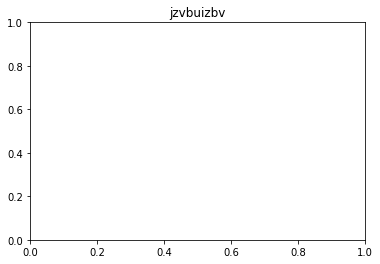

In [124]:
plot_hist(int_man, 'manufacturer_proba')


In [38]:
int_airbus = int_man[int_man['aircraft_manufacturer'] == 'Airbus'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_airbus

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
1,KLM_Airbus_A330-300_1.jpg,Airbus,Airbus,0.994603
7,Etihad_Airways_Airbus_A380_0.jpg,Airbus,Airbus,0.999975
17,Hawaiian_Airlines_Airbus_A321neo_0.jpg,Airbus,Airbus,0.999974
20,China_Airlines_Airbus_A330-300_V2_0.jpg,Airbus,Airbus,0.999813
25,Frontier_Airlines_Airbus_A319_V2_2.jpg,Airbus,Airbus,0.888194
30,Volaris_Airlines_Airbus_A320_2.jpg,Airbus,Airbus,0.957977
33,United_Airlines_Airbus_A319_V1_1.jpg,Airbus,Airbus,0.993726
34,Aer_Lingus_Airbus_A330-300_A_3.jpg,Airbus,Airbus,0.985706
37,Hawaiian_Airlines_Airbus_A330-200_V2_0.jpg,Airbus,Airbus,0.999735
39,South_African_Airways_Airbus_A340-600_0.jpg,Airbus,Airbus,0.990662


In [77]:
plot_hist(int_airbus, 'manufacturer_proba')

In [40]:
int_airbus_T = int_airbus[int_airbus['manufacturer'] == 'Airbus'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_airbus_T

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
1,KLM_Airbus_A330-300_1.jpg,Airbus,Airbus,0.994603
7,Etihad_Airways_Airbus_A380_0.jpg,Airbus,Airbus,0.999975
17,Hawaiian_Airlines_Airbus_A321neo_0.jpg,Airbus,Airbus,0.999974
20,China_Airlines_Airbus_A330-300_V2_0.jpg,Airbus,Airbus,0.999813
25,Frontier_Airlines_Airbus_A319_V2_2.jpg,Airbus,Airbus,0.888194
30,Volaris_Airlines_Airbus_A320_2.jpg,Airbus,Airbus,0.957977
33,United_Airlines_Airbus_A319_V1_1.jpg,Airbus,Airbus,0.993726
34,Aer_Lingus_Airbus_A330-300_A_3.jpg,Airbus,Airbus,0.985706
37,Hawaiian_Airlines_Airbus_A330-200_V2_0.jpg,Airbus,Airbus,0.999735
39,South_African_Airways_Airbus_A340-600_0.jpg,Airbus,Airbus,0.990662


In [78]:
plot_hist(int_airbus_T, 'manufacturer_proba')

In [44]:
int_airbus_F = int_airbus[int_airbus['manufacturer'] != 'Airbus'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_airbus_F 


,name,aircraft_manufacturer,manufacturer,manufacturer_proba
66,TAP_Portugal_Airbus_A330_V3_4.jpg,Airbus,Boeing,0.996213
79,China_Eastern_Airbus_A320_0.jpg,Airbus,Boeing,0.753864
102,Turkish_Airlines_Airbus_A330_1.jpg,Airbus,Boeing,0.964600
109,Qatar_Airways_Airbus_A320_B_4.jpg,Airbus,Boeing,0.901595
136,AirAsia_X_Airbus_A330-300_3.jpg,Airbus,Boeing,0.643842
143,Middle_East_Airlines_Airbus_A330-200_3.jpg,Airbus,Boeing,0.814380
149,United_Airlines_Airbus_A320_V3_2.jpg,Airbus,Boeing,0.548923
167,Air_China_Airbus_A321_1.jpg,Airbus,Boeing,0.949816
196,Saudia_Airbus_A330-300_V2_0.jpg,Airbus,Boeing,0.988271
215,Jet_Airways_Airbus_A330-300_0.jpg,Airbus,Boeing,0.862214


In [80]:
plot_hist(int_airbus_F, 'manufacturer_proba')

In [47]:
int_boeing = int_man[int_man['aircraft_manufacturer'] == 'Boeing'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_boeing

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
2,American_Airlines_Boeing_767-300_3.jpg,Boeing,Boeing,0.998506
5,American_Airlines_Boeing_787-8_1.jpg,Boeing,Boeing,0.737958
8,United_Airlines_Boeing_767_300_ER_1.jpg,Boeing,Boeing,0.999589
10,China_Eastern_Boeing_777_300ER_0.jpg,Boeing,Airbus,0.973872
14,Delta_Airlines_Boeing_767-300_D_New_0.jpg,Boeing,Boeing,0.998705
26,Norwegian_Air_Shuttle_Boeing_787-8_2.jpg,Boeing,Boeing,0.991384
27,Delta_Airlines_Boeing_737-900ER_3.jpg,Boeing,Airbus,0.873972
29,Jetstar_Boeing_787-8_4.jpg,Boeing,Boeing,0.998603
31,ANA_Boeing_787-900_0.jpg,Boeing,Boeing,0.981243
35,China_Eastern_Boeing_737_800_V4_2.jpg,Boeing,Boeing,0.988514


In [81]:
plot_hist(int_boeing, 'manufacturer_proba')

In [48]:
int_boeing_T = int_boeing[int_boeing['manufacturer'] == 'Boeing'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_boeing_T 

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
2,American_Airlines_Boeing_767-300_3.jpg,Boeing,Boeing,0.998506
5,American_Airlines_Boeing_787-8_1.jpg,Boeing,Boeing,0.737958
8,United_Airlines_Boeing_767_300_ER_1.jpg,Boeing,Boeing,0.999589
14,Delta_Airlines_Boeing_767-300_D_New_0.jpg,Boeing,Boeing,0.998705
26,Norwegian_Air_Shuttle_Boeing_787-8_2.jpg,Boeing,Boeing,0.991384
29,Jetstar_Boeing_787-8_4.jpg,Boeing,Boeing,0.998603
31,ANA_Boeing_787-900_0.jpg,Boeing,Boeing,0.981243
35,China_Eastern_Boeing_737_800_V4_2.jpg,Boeing,Boeing,0.988514
41,Delta_Airlines_Boeing_757-300_75Y_1.jpg,Boeing,Boeing,0.997748
44,TUIfly_Boeing_737-800_2.jpg,Boeing,Boeing,0.817392


In [82]:
plot_hist(int_boeing_T, 'manufacturer_proba')

In [49]:
int_boeing_F = int_boeing[int_boeing['manufacturer'] != 'Boeing'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_boeing_F 

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
10,China_Eastern_Boeing_777_300ER_0.jpg,Boeing,Airbus,0.973872
27,Delta_Airlines_Boeing_737-900ER_3.jpg,Boeing,Airbus,0.873972
81,Thai_Airways_Boeing_777-200_772_2.jpg,Boeing,Airbus,0.688800
92,Delta_Airlines_Boeing_737-800_A_2.jpg,Boeing,Airbus,0.996186
105,Ethiopian_Airlines_Boeing_777-300ER_3.jpg,Boeing,Airbus,0.960919
111,Royal_Jordanian_Boeing_787-8_1.jpg,Boeing,Airbus,0.999367
131,United_Airlines_UA_Boeing_787-10_4.jpg,Boeing,Airbus,0.617121
158,Air_Canada_Boeing_787-8_1.jpg,Boeing,Airbus,0.875913
173,Nok_Air_Boeing_737-800_2.jpg,Boeing,Airbus,0.724079
213,Japan_Airlines_Boeing_767-300ER_3.jpg,Boeing,Airbus,0.999136


In [115]:
plot_hist(int_boeing_F, 'manufacturer_proba')

In [83]:
int_other = int_man[int_man['aircraft_manufacturer'] == 'Other'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_other

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
6,Edelweiss_Air_A340-300_0.jpg,Other,Airbus,0.922528
15,Lufthansa_Embraer_190_0.jpg,Other,Boeing,0.827964
18,Austrian_Airlines_Embraer195_0.jpg,Other,Airbus,0.995192
32,American_Airlines_Embraer_EMB-190_3.jpg,Other,Airbus,0.999725
38,Air_Canada_Dash_81_0.jpg,Other,Boeing,0.996546
50,American_Airlines_ERJ-175_MCE_3.jpg,Other,Boeing,0.627910
54,United_Airlines_Embraer_Emb_175_1.jpg,Other,Boeing,0.872687
77,Swiss_Airlines_A330_0.jpg,Other,Airbus,0.718059
89,United_Airlines_Embraer_EMB-170_1.jpg,Other,Airbus,0.901731
112,JetBlue_Airways_Embraer_190_1.jpg,Other,Boeing,0.671258


In [119]:
plot_hist(int_other, 'manufacturer_proba')

In [51]:
int_other_airbus = int_other[int_other['manufacturer'] == 'Airbus'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_other_airbus

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
6,Edelweiss_Air_A340-300_0.jpg,Other,Airbus,0.922528
18,Austrian_Airlines_Embraer195_0.jpg,Other,Airbus,0.995192
32,American_Airlines_Embraer_EMB-190_3.jpg,Other,Airbus,0.999725
77,Swiss_Airlines_A330_0.jpg,Other,Airbus,0.718059
89,United_Airlines_Embraer_EMB-170_1.jpg,Other,Airbus,0.901731
113,Swiss_Airlines_A330_2.jpg,Other,Airbus,0.998235
139,United_Airlines_Embraer_Emb_175_2.jpg,Other,Airbus,0.959525
156,American_Airlines_Embraer_ERJ-140_3.jpg,Other,Airbus,0.560479
164,Delta_Airlines_Canadair_CRJ900_C_3.jpg,Other,Airbus,0.999881
190,Air_Canada_Embraer_175_2.jpg,Other,Airbus,0.999359


In [86]:
plot_hist(int_other_airbus, 'manufacturer_proba')

In [52]:
int_other_boeing = int_other[int_other['manufacturer'] == 'Boeing'][['name', 'aircraft_manufacturer', 'manufacturer','manufacturer_proba']]
int_other_boeing

,name,aircraft_manufacturer,manufacturer,manufacturer_proba
15,Lufthansa_Embraer_190_0.jpg,Other,Boeing,0.827964
38,Air_Canada_Dash_81_0.jpg,Other,Boeing,0.996546
50,American_Airlines_ERJ-175_MCE_3.jpg,Other,Boeing,0.627910
54,United_Airlines_Embraer_Emb_175_1.jpg,Other,Boeing,0.872687
112,JetBlue_Airways_Embraer_190_1.jpg,Other,Boeing,0.671258
185,Virgin_Atlantic_Airways_B747-400_LGW-1_1.jpg,Other,Boeing,0.541010
192,Virgin_Atlantic_Airways_B747-400_LGW-1_2.jpg,Other,Boeing,0.545166
202,United_Airlines_Embraer_EMB-170_0.jpg,Other,Boeing,0.919532
247,Delta_Airlines_MD-90_1.jpg,Other,Boeing,0.985136
251,AeroMexico_Embraer_ERJ-190_1.jpg,Other,Boeing,0.990392


In [87]:
plot_hist(int_other_boeing, 'manufacturer_proba')